# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
! pip install -U spacy
import spacy
import os
path = os.getcwd()
pd.set_option("max_columns",0)

# df_pred

In [ ]:
df_pred = pd.read_pickle(r'./csv/df_pred_bert.pkl')

In [ ]:
df_pred_med = pd.read_pickle(r'./csv/df_pred_medical.pkl')

In [ ]:
df_pred['token_offsets'] = df_pred['token_offsets'].apply(lambda x: [tuple(i) for i in x])

In [ ]:
x = df_pred.loc[0,'token_offsets']

In [ ]:
len(x)

512

In [ ]:
df_pred['pn_history_len'] = df_pred['pn_history'].apply(len)

In [ ]:
m = df_pred['pn_history_len'].median()

In [ ]:
m

864.0

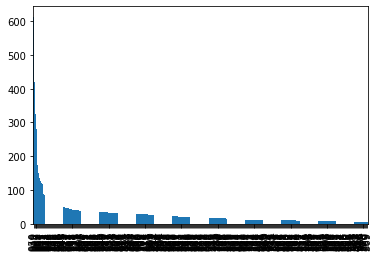

In [ ]:
df_pred['pn_history_len'].value_counts().plot.bar() #.sort_index()

In [ ]:
df_pred.iloc[60:100]

,id,case_num,pn_num,feature_num,annotation,location,annotation_list,location_list,pn_history,feature_text,location_prediction,token_proba,token_offsets,stratify_on,fold,token_offsets_len,pn_historys_len
60,00188_002,0,188,2,['chest pressure'],['250 264'],[chest pressure],[250 264],17 yo m college student comes to the clinic du...,chest pressure,"[(250, 264)]","[-7.136645, -5.221761, -7.7985096, -0.9878923,...","[(0, 0), (0, 5), (6, 14), (0, 0), (0, 2), (3, ...",02,0,512,950
61,00188_003,0,188,3,"['episodes', 'episodes']","['93 101', '284 292']","[episodes, episodes]","[93 101, 284 292]",17 yo m college student comes to the clinic du...,intermittent symptoms,"[(93, 101), (577, 583)]","[-7.798456, -5.339254, -8.345814, -0.817473, -...","[(0, 0), (0, 12), (13, 21), (0, 0), (0, 2), (3...",03,0,512,950
62,00188_006,0,188,6,"['aderol', 'aderol', 'aderol']","['457 463', '507 513', '655 661']","[aderol, aderol, aderol]","[457 463, 507 513, 655 661]",17 yo m college student comes to the clinic du...,adderall use,"[(457, 463), (507, 513), (928, 934)]","[-7.246199, -6.5543327, -7.798181, -8.341732, ...","[(0, 0), (0, 3), (3, 7), (7, 8), (9, 12), (0, ...",06,0,512,950
63,00188_009,0,188,9,"['heart pounding', 'heart pounding', 'palpitat...","['51 65', '105 119', '577 589']","[heart pounding, heart pounding, palpitations]","[51 65, 105 119, 577 589]",17 yo m college student comes to the clinic du...,heart pounding; heart racing,"[(51, 65), (105, 119), (577, 589)]","[-7.428301, -3.0467758, -5.1871295, -8.134842,...","[(0, 0), (0, 5), (6, 14), (14, 15), (16, 21), ...",09,0,512,950
64,00188_010,0,188,10,['for the last 3-4 months'],['120 143'],[for the last 3-4 months],[120 143],17 yo m college student comes to the clinic du...,few months duration,"[(120, 143)]","[-7.1973653, -2.44726, -5.7206783, -6.086036, ...","[(0, 0), (0, 3), (4, 10), (11, 19), (0, 0), (0...",010,0,512,950
65,00188_011,0,188,11,['17 yo'],['0 5'],[17 yo],[0 5],17 yo m college student comes to the clinic du...,17 year,"[(0, 5)]","[-6.2326436, 1.4897791, 0.83045316, -0.8482974...","[(0, 0), (0, 2), (3, 7), (0, 0), (0, 2), (3, 5...",011,0,512,950
66,00188_012,0,188,12,['M'],['6 7'],[M],[6 7],17 yo m college student comes to the clinic du...,male,"[(6, 7)]","[-6.335395, 2.225962, -0.4563678, -7.248816, -...","[(0, 0), (0, 4), (0, 0), (0, 2), (3, 5), (6, 7...",012,0,512,950
67,00211_000,0,211,0,['Father MI'],['682 688;695 697'],[Father MI],[682 688;695 697],hpi: patient is a 17 yo m with a c/o of palpit...,family history of mi; family history of myocar...,"[(682, 697)]","[-7.4368453, -6.980013, -8.448614, -8.408784, ...","[(0, 0), (0, 6), (7, 14), (15, 17), (18, 20), ...",00,0,512,737
68,00211_001,0,211,1,"['thyroid problem', 'Mother has a thyroid prob...","['665 680', '652 680']","[thyroid problem, Mother has a thyroid problem]","[665 680, 652 680]",hpi: patient is a 17 yo m with a c/o of palpit...,family history of thyroid disorder,"[(652, 680)]","[-6.817587, -6.988191, -8.122416, -8.235152, -...","[(0, 0), (0, 6), (7, 14), (15, 17), (18, 25), ...",01,0,512,737
69,00211_002,0,211,2,['chest pressure'],['411 425'],[chest pressure],[411 425],hpi: patient is a 17 yo m with a c/o of palpit...,chest pressure,"[(411, 425), (434, 440), (448, 450), (455, 460)]","[-7.573737, -6.1815586, -7.1588893, -1.2083873...","[(0, 0), (0, 5), (6, 14), (0, 0), (0, 2), (2, ...",02,0,512,737


# Visualization Token Probabilities

In [ ]:
prob = df_pred.filter(items=['token_proba', 'token_offsets'])

In [ ]:
prob['token_offsets'] = prob['token_offsets'].apply(lambda x: [str(i) for i in x])

In [ ]:
df_pred.loc[4370, 'pn_history_len']

950

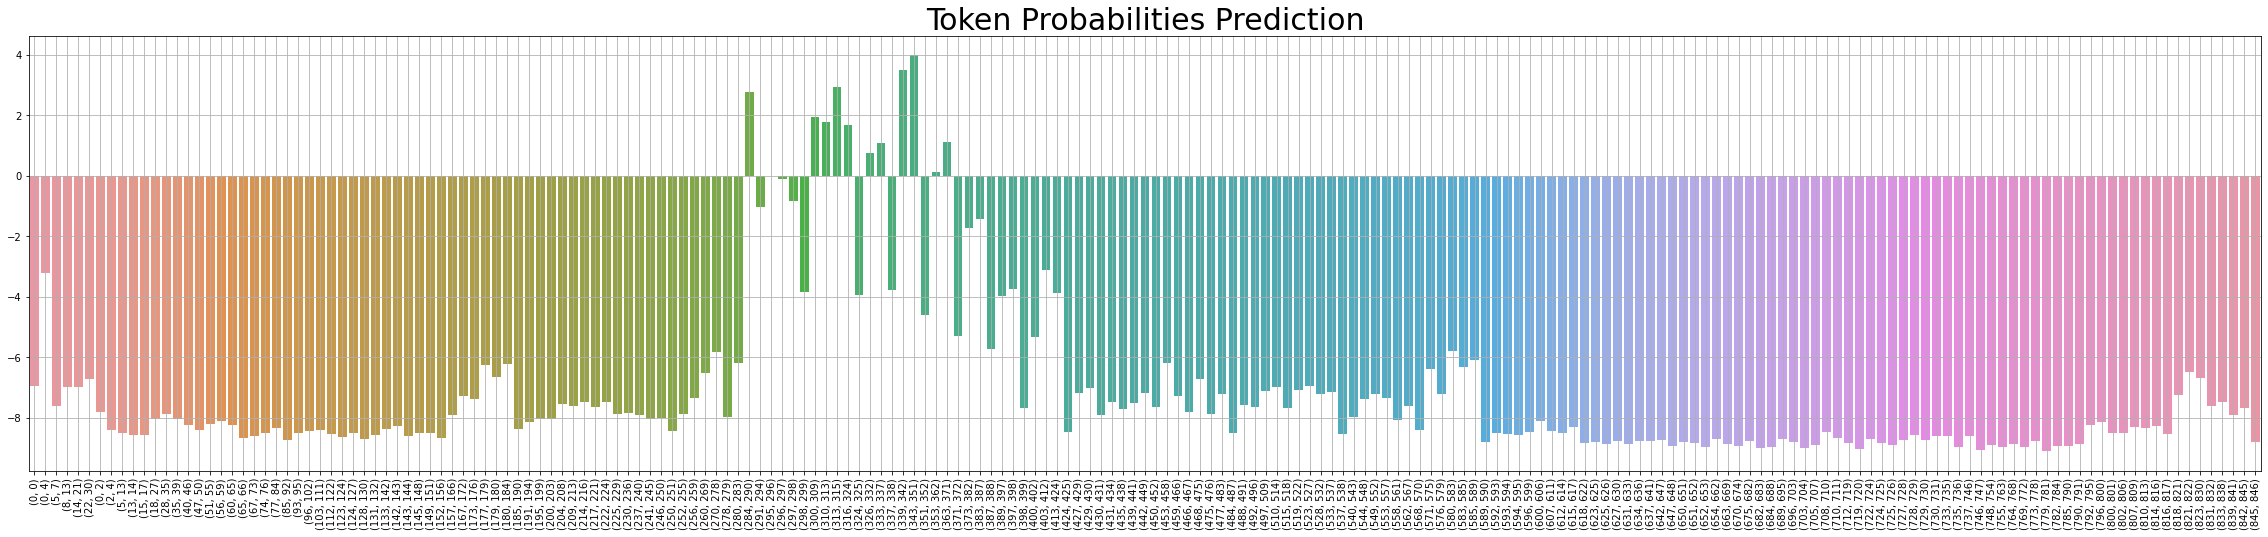

In [ ]:
idx_vis1 = 4697
ax = sns.barplot(x=prob.loc[idx_vis1, 'token_offsets'], y=prob.loc[idx_vis1, 'token_proba'], ci=None)
ax.tick_params(axis='x', rotation=90)
# ax.set(yticks=np.arange(-8,3,0.5))
ax.grid(True)
plt.title('Token Probabilities Prediction', fontsize = 30)
plt.rcParams["figure.figsize"] = (40,8)

plt.show()

In [23]:
df_pred.loc[4697, 'location_prediction']

[(284, 290), (300, 324), (326, 337), (339, 351), (353, 371)]

# Visualization Marker

## Ground Truth

In [ ]:
# interesting indexes: 626, 4, 6, 35, 75, 94, 8462, 201, 4697

In [ ]:
def marker(df, idx, ground_truth = True):
  df_pred = df
  pn_history= df_pred.loc[idx,'pn_history']
  start_pos = []
  end_pos = []

  if ground_truth:
    locations = df_pred.loc[idx,'location_list']
    for location in locations:
      for loc in [s.split() for s in location.split(';')]:
        start_pos.append(int(loc[0]))
        end_pos.append(int(loc[1]))
  else:
    locations = df_pred.loc[idx,'location_prediction']
    for loc in locations:
      if loc == (0,0):
        continue
      start_pos.append(int(loc[0]))
      end_pos.append(int(loc[1]))
  
  ents = []
  for i in range(len(start_pos)):
    ents.append({
        'start': int(start_pos[i]), 
        'end' : int(end_pos[i]),
        "label" : "Annotation"
        })
  doc = {
      'text' : pn_history,
      "ents" : ents
  }

  colors = {"Annotation" :"linear-gradient(90deg, #aa9cfc, #fc9ce7)" } 
  options = {"colors": colors}
  spacy.displacy.render(doc, style="ent", options = options , manual=True, jupyter=True);
  return

In [ ]:
df_pred.loc[4697,'pn_history']

'45yo complains of increased nervousness during the past few weeks, mostly on sundays related to monday teaching activities (she is a professor), she is also concerned about her in-laws since she must now take care of them at home during her free time. she has decreased appetite. she denies any n/v, increased bowel movement, weight loss, eye problems, increased sweating, abdominal pain, headaches, or increased temperature.\r\npmh:she has no history of prior illness, surgery, trauma and was only hospitalized when her two kids were born.\r\nshe does not take any drugs or have any allergies.\r\nfh: her father dies of mi aged 65, she is an only child.\r\nsx: sexually active with husband, only sexual partner. no std history.\r\nobg: g2p2\r\nsh: professor, drinks socially does not smoke or do drugs. two kids, aged 21 and 18, dont present a worry to her.'

In [ ]:
idx_vis2=4697
# print ground truth
marker(df_pred, idx_vis2, ground_truth = True)

In [ ]:
# print prediction from bert
marker(df_pred, idx_vis2, ground_truth = False)

In [ ]:
# print prediction from Med
marker(df_pred_med, idx_vis2, ground_truth = False)

In [ ]:
w = df_pred_med[df_pred_med['feature_num'] == 400]

In [ ]:
w

,id,case_num,pn_num,feature_num,annotation,location,annotation_list,location_list,pn_history,feature_text,location_prediction,token_proba,token_offsets,stratify_on,fold
4136,40045_400,4,40045,400,"['denies palpitations', 'denies tremors', 'den...","['468 474;491 503', '468 474;546 553', '468 47...","[denies palpitations, denies tremors, denies s...","[468 474;491 503, 468 474;546 553, 468 474;505...",mrs. moore is a 45 year old female presenting ...,lack of other thyroid symptoms,"[(468, 474), (491, 503), (505, 514), (546, 553...","[-8.37384, -8.04242, -7.422503, -7.3417706, -6...","[[0, 0], [0, 4], [5, 7], [8, 13], [14, 17], [1...",4400,0
4143,40085_400,4,40085,400,"['denies palpitations', 'denies diaphoresis', ...","['494 513', '494 500;515 526', '494 500;554 57...","[denies palpitations, denies diaphoresis, deni...","[494 513, 494 500;515 526, 494 500;554 579, 49...",karin moore is a 45 year old f who presents wi...,lack of other thyroid symptoms,"[(494, 513), (515, 526), (554, 558), (563, 579...","[-8.300594, -7.921769, -7.1196094, -7.2224784,...","[[0, 0], [0, 4], [5, 7], [8, 13], [14, 17], [1...",4400,0
4151,40139_400,4,40139,400,"['NO PALPITATION', 'NO CHANGES IN HAIR OR SKIN']","['365 379', '365 367;393 416']","[NO PALPITATION, NO CHANGES IN HAIR OR SKIN]","[365 379, 365 367;393 416]","karin moore, a 45-year-old female, has come to...",lack of other thyroid symptoms,"[(365, 379), (393, 416), (0, 0), (0, 0), (0, 0...","[-7.6872015, -8.332187, -8.029115, -8.042607, ...","[[0, 0], [0, 4], [5, 7], [8, 13], [14, 17], [1...",4400,0
4165,40187_400,4,40187,400,"['Denies bowel movements', 'Denies hot intoler...","['502 508;528 543', '502 508;545 560', '502 50...","[Denies bowel movements, Denies hot intoleranc...","[502 508;528 543, 502 508;545 560, 502 508;562...",45 yo f pt come to the outpatient clinic due t...,lack of other thyroid symptoms,"[(502, 508), (528, 543), (545, 560), (562, 573...","[-7.918625, -7.738392, -7.506768, -7.677026, -...","[[0, 0], [0, 4], [5, 7], [8, 13], [14, 17], [1...",4400,0
4173,40426_400,4,40426,400,['No heart racing'],['412 414;488 500'],[No heart racing],[412 414;488 500],45 yr old f came to clinic with c/o nervousens...,lack of other thyroid symptoms,"[(488, 500)]","[-8.715982, -8.796265, -8.151892, -8.141508, -...","[[0, 0], [0, 4], [5, 7], [8, 13], [14, 17], [1...",4400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844,44921_400,4,44921,400,"['Denies palpitations', 'Denies change in bowe...","['589 595;661 673', '589 595;703 712;724 736']","[Denies palpitations, Denies change in bowel h...","[589 595;661 673, 589 595;703 712;724 736]",45 y/o female who reports to the office experi...,lack of other thyroid symptoms,"[(0, 0), (589, 595), (661, 673), (703, 736), (...","[-7.0637636, -6.7874, -6.818967, -6.7050543, -...","[[0, 0], [0, 4], [5, 7], [8, 13], [14, 17], [1...",4400,4
4852,44958_400,4,44958,400,['no recent change in bowel habits'],['628 647;679 691'],[no recent change in bowel habits],[628 647;679 691],45 yo f g2p2 c/o nervousness since a few week...,lack of other thyroid symptoms,"[(0, 0), (669, 691), (0, 0)]","[-7.6130934, -6.433424, -6.6017118, -6.15967, ...","[[0, 0], [0, 4], [5, 7], [8, 13], [14, 17], [1...",4400,4
4860,45218_400,4,45218,400,"['No hot/cold intolerance', 'No palpitations']","['594 617', '594 596;635 647']","[No hot/cold intolerance, No palpitations]","[594 617, 594 596;635 647]",ms. moore is a 45 yo female with 1 month histo...,lack of other thyroid symptoms,"[(0, 0), (594, 596), (600, 617), (635, 647), (...","[-7.6159816, -6.7279205, -6.4287024, -5.956068...","[[0, 0], [0, 4], [5, 7], [8, 13], [14, 17], [1...",4400,4
4867,45266_400,4,45266,400,"['denies tremors', 'denies palpitations', 'den...","['337 343;370 377', '337 343;379 391', '337 34...","[denies tremors, denies palpitations, denies s...","[337 343;370 377, 337 343;379 391, 337 343;395...","karin moore, 45 yo f comes in complaining of n...",lack of other thyroid symptoms,"[(0, 0), (337

In [ ]:
df_pred_med.sample(10)

,id,case_num,pn_num,feature_num,annotation,location,annotation_list,location_list,pn_history,feature_text,location_prediction,token_proba,token_offsets,stratify_on,fold
865,02163_005,0,2163,5,['Denies any sweating'],['427 446'],[Denies any sweating],[427 446],mr cleveland is a 17 yo male c/o heart punding...,no hair changes; no nail changes; no temperatu...,"[(0, 0), (0, 0)]","[-6.523326, -4.7595367, -5.013625, -6.3576756,...","[[0, 0], [0, 2], [3, 7], [8, 15], [15, 16], [1...",05,4
9586,93634_913,9,93634,913,['F'],['24 25'],[F],[24 25],stephanie madden 20 y/o f with cc of headache\...,female,"[(0, 0), (24, 25), (0, 0)]","[-7.3540792, -0.6122001, 0.93051857, -7.350352...","[[0, 0], [0, 6], [0, 0], [0, 4], [4, 8], [8, 9...",9913,3
2954,30116_304,3,30116,304,['burning/gnawing'],['327 342'],[burning/gnawing],[327 342],chad hamilton is a 35yo male with no significa...,burning; gnawing; burning and gnawing,"[(327, 342), (0, 0)]","[-8.524644, -2.4758224, -4.5533977, -0.3148728...","[[0, 0], [0, 7], [7, 8], [9, 10], [10, 12], [1...",3304,0
8122,81445_806,8,81445,806,['longer to fall asleep'],['115 136'],[longer to fall asleep],[115 136],67 year old f presening with a history of diff...,difficulty falling asleep,"[(105, 136), (0, 0), (0, 0), (0, 0)]","[-8.948244, -3.7632394, -4.0860496, -4.004176,...","[[0, 0], [0, 10], [11, 18], [19, 25], [0, 0], ...",8806,1
6957,61668_611,6,61668,611,['sharp'],['58 63'],[sharp],[58 63],mr. smith is a 17 year old male presenting to ...,sharp; stabbing; 7 to 8 out of 10 on pain scale,"[(0, 0), (58, 63), (0, 0)]","[-5.6173997, -0.9030171, -2.1884813, -0.890106...","[[0, 0], [0, 5], [5, 6], [7, 15], [15, 16], [1...",6611,4
5198,52390_500,5,52390,500,['noticed 5 years ago'],['64 83'],[noticed 5 years ago],[64 83],ms. whelan is a 26 yo woman with history of pa...,onset 5 years ago,"[(58, 83), (0, 0)]","[-9.045737, -5.017472, -6.1491265, -6.247987, ...","[[0, 0], [0, 5], [6, 7], [8, 13], [14, 17], [0...",5500,1
2312,20926_212,2,20926,212,"['anywhere from 2-6 days', 'light to heavy']","['107 129', '131 145']","[anywhere from 2-6 days, light to heavy]","[107 129, 131 145]",44 year old female who presents with 3 years o...,irregular flow; irregular frequency; irregular...,"[(103, 145), (0, 0), (0, 0), (0, 0)]","[-8.455334, -6.601577, -6.2179294, -6.8439484,...","[[0, 0], [0, 9], [10, 14], [14, 15], [16, 25],...",2212,1
7595,73395_701,7,73395,701,['weight gain'],['567 578'],[weight gain],[567 578],angela tompkins is a g0p0 35 year old female w...,weight gain,"[(0, 0), (563, 578), (0, 0)]","[-7.377451, -3.8902097, -4.2260203, 0.327572, ...","[[0, 0], [0, 6], [7, 11], [0, 0], [0, 5], [5, ...",7701,3
1474,10487_106,1,10487,106,['recurrent RLQ pain (3-4times/6months)'],['207 244'],[recurrent RLQ pain (3-4times/6months)],[207 244],20 yo f c/o abdominal pain since 8-10hrs ago \...,recurrent bouts over past 6 months,"[(0, 0), (207, 243), (0, 0), (0, 0), (0, 0)]","[-6.856089, -5.3420606, -5.174521, -4.182619, ...","[[0, 0], [0, 2], [2, 9], [10, 15], [16, 20], [...",1106,2
8748,83893_813,8,83893,813,"['saw Leonard"" 4 days ago']",['554 577'],"[saw Leonard"" 4 days ago]",[554 577],67year old female with pmh of breast cancer in...,visual hallucination once,"[(0, 0), (554, 577), (0, 0), (0, 0)]","[-7.8100257, -7.075004, -6.571594, -6.8306127,...","[[0, 0], [0, 6], [7, 11], [11, 13], [13, 20], ...",8813,4
